In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("united_filtered.csv", sep=';')

**Описание признаков и их типов**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88947 entries, 0 to 88946
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               88131 non-null  object 
 1   author_type          88216 non-null  object 
 2   url                  88947 non-null  object 
 3   location             88947 non-null  object 
 4   deal_type            88947 non-null  object 
 5   accommodation_type   88947 non-null  object 
 6   floor                88947 non-null  int64  
 7   floors_count         88947 non-null  int64  
 8   rooms_count          88947 non-null  int64  
 9   total_meters         88947 non-null  float64
 10  price                88061 non-null  float64
 11  district             77156 non-null  object 
 12  street               77832 non-null  object 
 13  house_number         82167 non-null  object 
 14  underground          87282 non-null  object 
 15  residential_complex  47102 non-null 

1. **author** *(object)*  
   Имя или идентификатор автора объявления.

2. **author_type** *(object)*  
   Тип автора (например, частное лицо или агентство недвижимости).

3. **url** *(object)*  
   Ссылка на страницу объявления.

4. **location** *(object)*  
   Город, в котором расположен объект (например, Москва).

5. **deal_type** *(object)*  
   Тип сделки (например, продажа).

6. **accommodation_type** *(object)*  
   Тип объекта недвижимости (например, квартира).

7. **floor** *(int64)*  
   Этаж, на котором находится объект.

8. **floors_count** *(int64)*  
   Общее количество этажей в здании.

9. **rooms_count** *(int64)*  
   Количество комнат в объекте.

10. **total_meters** *(float64)*  
    Общая площадь объекта в квадратных метрах.

11. **price** *(float64)*  
    Стоимость объекта в рублях.

12. **district** *(object)*  
    Район, где находится объект.

13. **street** *(object)*  
    Улица, где расположен объект.

14. **house_number** *(object)*  
    Номер дома.

15. **underground** *(object)*  
    Название ближайшей станции метро.

16. **residential_complex** *(object)*  
    Название жилого комплекса.  

In [ ]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground,residential_complex
0,Sminex,developer,https://www.cian.ru/sale/flat/306341805/,Москва,sale,flat,5,12,4,184.7,460790000.0,Хамовники,Фрунзенская набережная,30,Фрунзенская,Клубный город-парк
1,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/297733877/,Москва,sale,flat,80,85,4,294.6,412440000.0,Пресненский,Московский международный деловой центр Москва-...,NaN,Деловой центр,NaN
2,VESPER,developer,https://www.cian.ru/sale/flat/306541543/,Москва,sale,flat,18,21,4,234.3,328184010.0,Пресненский,Костикова,4к1,Улица 1905 года,Lucky
3,SHOW ME,real_estate_agent,https://www.cian.ru/sale/flat/293126875/,Москва,sale,flat,21,23,4,244.1,78000000.0,Хорошевский,Гризодубовой,2,ЦСКА,Гранд-парк
4,Sminex,developer,https://www.cian.ru/sale/flat/303408628/,Москва,sale,flat,5,14,4,198.4,557450000.0,Якиманка,NaN,NaN,Полянка,Лаврушинский ЖК


**Информация о пропущенных значениях**

In [ ]:
df.isna().sum()

,0
author,816
author_type,731
url,0
location,0
deal_type,0
accommodation_type,0
floor,0
floors_count,0
rooms_count,0
total_meters,0


Для оптимизации анализа данных и устранения избыточной информации в датафрейме мы удалим столбцы, которые не несут смысловой нагрузки, такие как **author**, **author_type**, **url**, и **residential_complex**.

Кроме того, будут исключены столбцы, значения которых одинаковы для всех записей, например, **location** (город), **deal_type** (тип сделки), и **accommodation_type** (тип объекта недвижимости), поскольку эти данные фиксированы для данного набора данных.

In [16]:
df['location'].unique()

array(['Москва'], dtype=object)

In [17]:
df['deal_type'].unique()

array(['sale'], dtype=object)

In [18]:
df['accommodation_type'].unique()

array(['flat'], dtype=object)

In [6]:
df_filtered = df.drop(['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'residential_complex'], axis=1)

**Основные статистики**

In [21]:
df_filtered.describe(include='all')

,floor,floors_count,rooms_count,total_meters,price,district,street,house_number,underground
count,88947.000000,88947.000000,88947.000000,88947.000000,8.806100e+04,77156,77832,82167,87282
unique,NaN,NaN,NaN,NaN,NaN,180,2371,3788,345
top,NaN,NaN,NaN,NaN,NaN,Раменки,Зеленоград,2,Рассказовка
freq,NaN,NaN,NaN,NaN,NaN,3687,754,2000,1504
mean,9.572993,18.577276,1.988825,63.611461,3.459065e+07,NaN,NaN,NaN,NaN
std,8.609934,12.449811,1.095618,41.474523,6.910317e+07,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,0.300000,1.550000e+06,NaN,NaN,NaN,NaN
25%,4.000000,9.000000,1.000000,38.900000,1.225000e+07,NaN,NaN,NaN,NaN
50%,7.000000,16.000000,2.000000,54.000000,1.750000e+07,NaN,NaN,NaN,NaN
75%,13.000000,24.000000,3.000000,74.000000,3.040000e+07,NaN,NaN,NaN,NaN


**Поиск и удаление дубликатов**

Проверим, имеются ли в датасете полные дубли. Если они обнаружатся, удалим их с помощью метода drop_duplicates()

In [33]:
df_size_before_dedup = df_filtered.shape[0]

In [7]:
if df_filtered.duplicated().any():
  df_filtered = df_filtered.drop_duplicates()
else:
  print('Полные дубликаты отсутствуют!')

In [35]:
df_size_after_dedup = df_filtered.shape[0]

In [36]:
df_size_before_dedup - df_size_after_dedup

18325

Таким образом, в нашем датасете было найдено 18325 дублей, которые мы удалили.

**Поиск пропущенных значений и способы обработки**

Для начала необходимо выявить, есть ли пропущенные значения в датасете.

In [8]:
df_filtered.isna().sum()

,0
floor,0
floors_count,0
rooms_count,0
total_meters,0
price,831
district,9834
street,10233
house_number,6295
underground,1177


Так как пропусков много, для их заполнения используем следующие методы.

Для числовых данных используем заполнение медианным значением.

In [39]:
df_filtered['price'] = df_filtered['price'].fillna(df_filtered['price'].median())

Для категориальных данных — заполнение модой.

In [41]:
mode_fill = lambda col: col.fillna(col.mode()[0])
df_filtered[['district', 'street', 'house_number', 'underground']] = df_filtered[['district', 'street', 'house_number', 'underground']].apply(mode_fill)

In [42]:
df_filtered.isna().sum()

,0
floor,0
floors_count,0
rooms_count,0
total_meters,0
price,0
district,0
street,0
house_number,0
underground,0


Таким образом, в нашем датасете больше не осталось пропущенных значений.

**Валидация значений**

Выполним валидацию значений в числовых столбцах DataFrame, подсчитывая количество отрицательных значений в каждом из них.

In [43]:
data = [
    {
        'Название': column,
        'Кол-во отрицательных значений': (df_filtered[column] < 0).sum()
    }
    for column in df_filtered.select_dtypes(['int64', 'float64']).columns
]

pd.DataFrame(data)

,Название,Кол-во отрицательных значений
0,floor,0
1,floors_count,0
2,rooms_count,0
3,total_meters,0
4,price,0


Таким образом, как мы можем заметить из таблицы, в каждом числовом столбце нет отрицательных значений.

**Изучение поведения каждого признака**

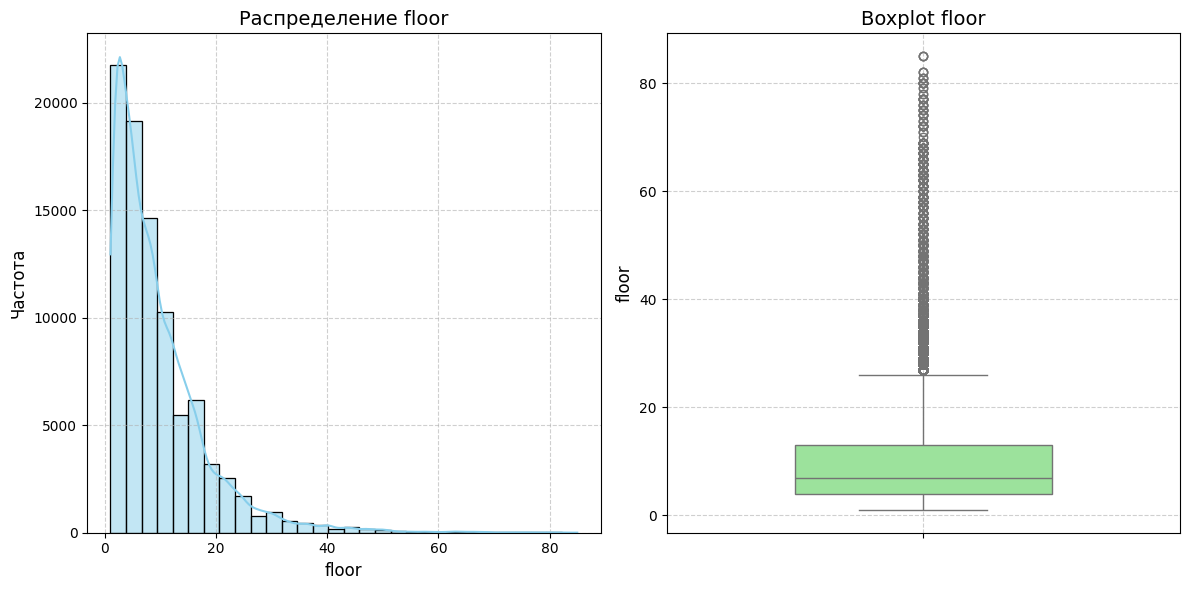

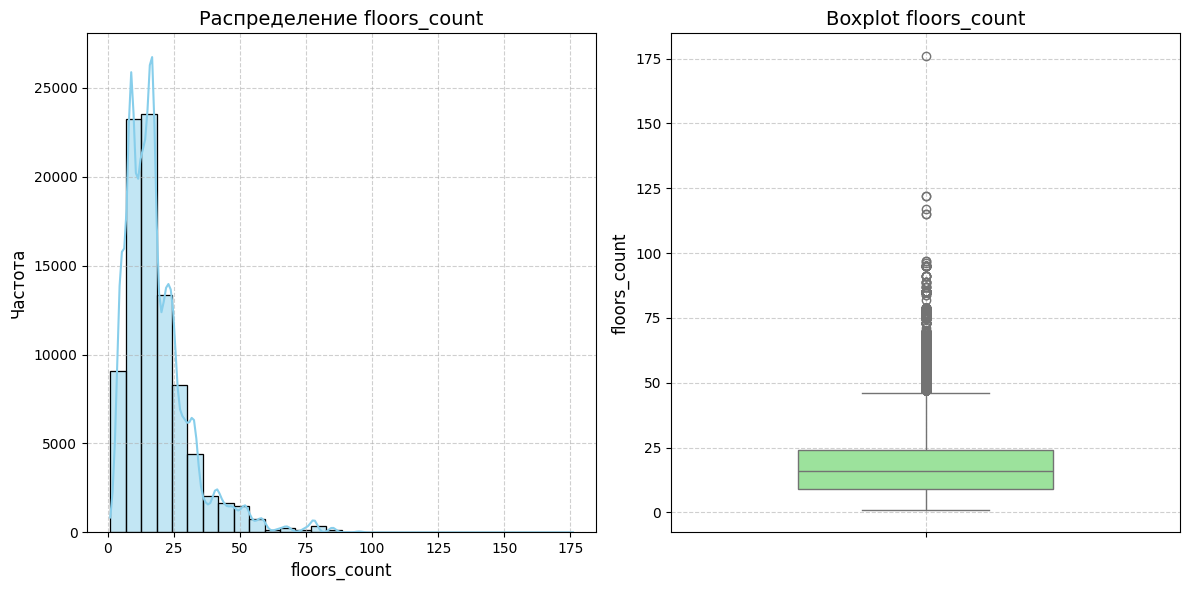

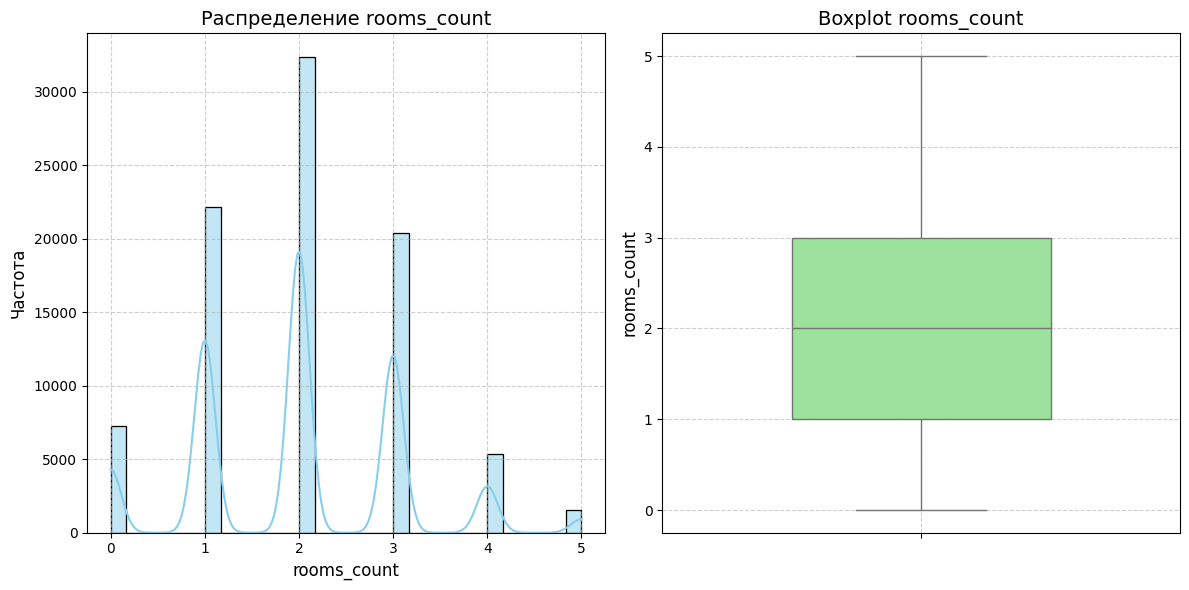

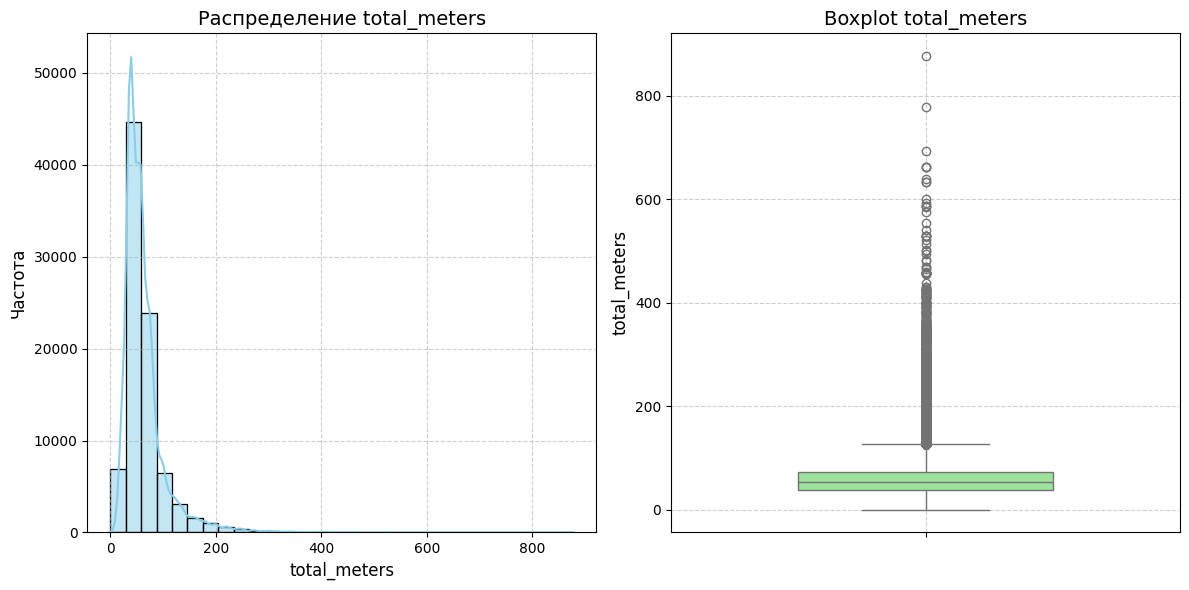

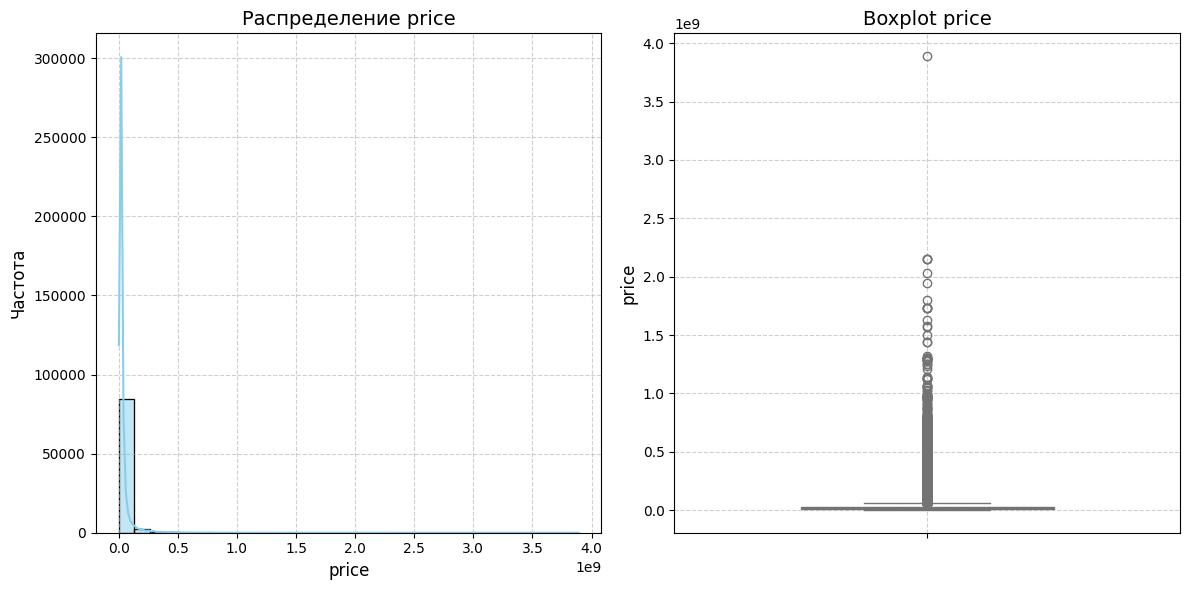

In [9]:
def plot_feature_distributions(data, features):
    """Функция для визуализации распределений и boxplot числовых признаков."""
    for feature in features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        sns.histplot(data[feature], bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
        axes[0].set_title(f'Распределение {feature}', fontsize=14)
        axes[0].set_xlabel(feature, fontsize=12)
        axes[0].set_ylabel('Частота', fontsize=12)
        axes[0].grid(visible=True, linestyle='--', alpha=0.6)

        sns.boxplot(y=data[feature], ax=axes[1], color='lightgreen', width=0.5)
        axes[1].set_title(f'Boxplot {feature}', fontsize=14)
        axes[1].set_ylabel(feature, fontsize=12)
        axes[1].grid(visible=True, linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.show()

numerical_features = ['floor', 'floors_count', 'rooms_count', 'total_meters', 'price']
plot_feature_distributions(df, numerical_features)

   - **`floor` (этаж):**
     - Распределение смещено в сторону низких значений, среднее значение составляет около 9,6.
     - Boxplot указывает на наличие выбросов, особенно для этажей выше 50.
   
   - **`floors_count` (количество этажей):**
     - Большинство зданий имеют до 30 этажей.
   
   - **`rooms_count` (количество комнат):**
     - Основная масса квартир имеет 1–3 комнаты. Распределение смещено вправо, выбросы заметны при значениях от 4 и выше.
   
   - **`total_meters` (общая площадь):**
     - Большинство данных сосредоточено в диапазоне до 150 м². Выбросы наблюдаются для площадей свыше 300 м².
   
   - **`price` (цена):**
     - Большинство объектов находятся в диапазоне до 50 млн руб., но присутствуют значительные выбросы вплоть до 3.8 млрд руб.

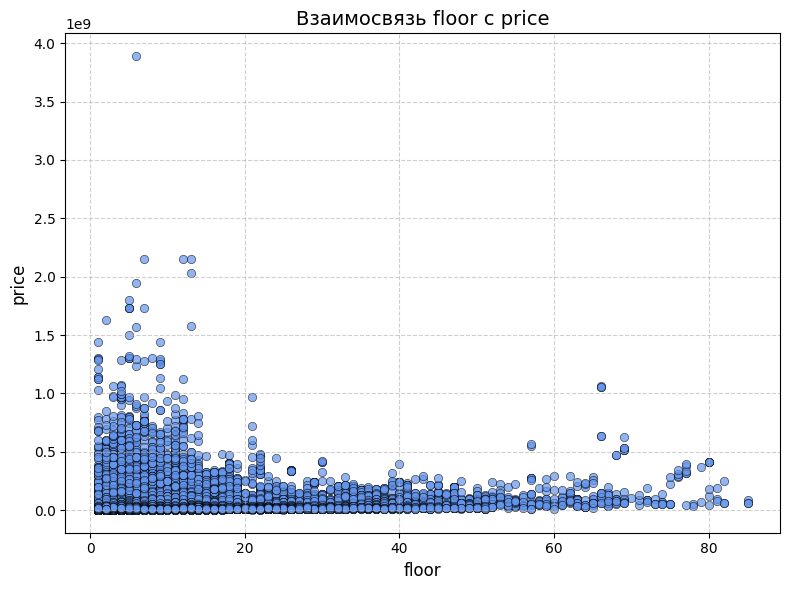

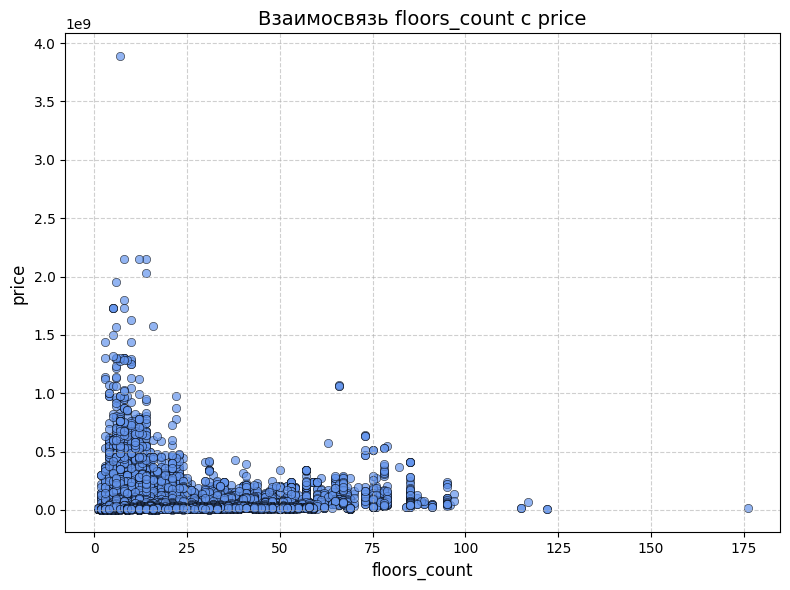

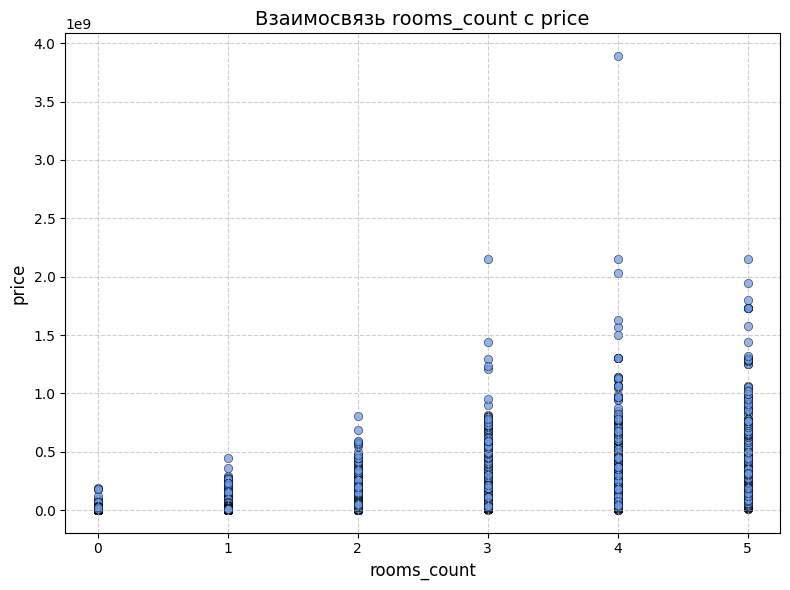

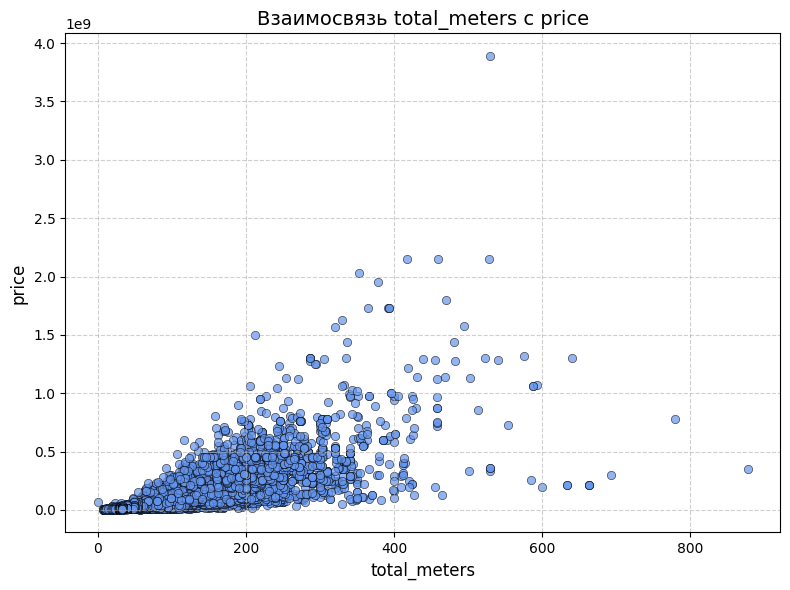

In [10]:
def plot_feature_price_relationships(data, features, target):
    """Функция для визуализации взаимосвязи числовых признаков с целевой переменной."""
    for feature in features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[feature], y=data[target], color='cornflowerblue', edgecolor='black', alpha=0.7)
        plt.title(f'Взаимосвязь {feature} с {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.grid(visible=True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

numerical_features = ['floor', 'floors_count', 'rooms_count', 'total_meters']
plot_feature_price_relationships(df, numerical_features, 'price')


- **`floor` и `price`:**
     Явная зависимость между этажом и ценой отсутствует.

- **`floors_count` и `price`:**
     Высотные здания (свыше 30 этажей) чаще имеют высокую стоимость. Однако и здания с 5–20 этажами могут быть дорогими из-за других факторов, таких как расположение.

- **`rooms_count` и `price`:**
     Чем больше комнат, тем выше стоимость.

- **`total_meters` и `price`:**
     Наблюдается четкая корреляция - увеличение площади ведет к росту цены. При этом выбросы с необычно высокой стоимостью встречаются даже у объектов меньшей площади.

**Попарные распределения признаков**

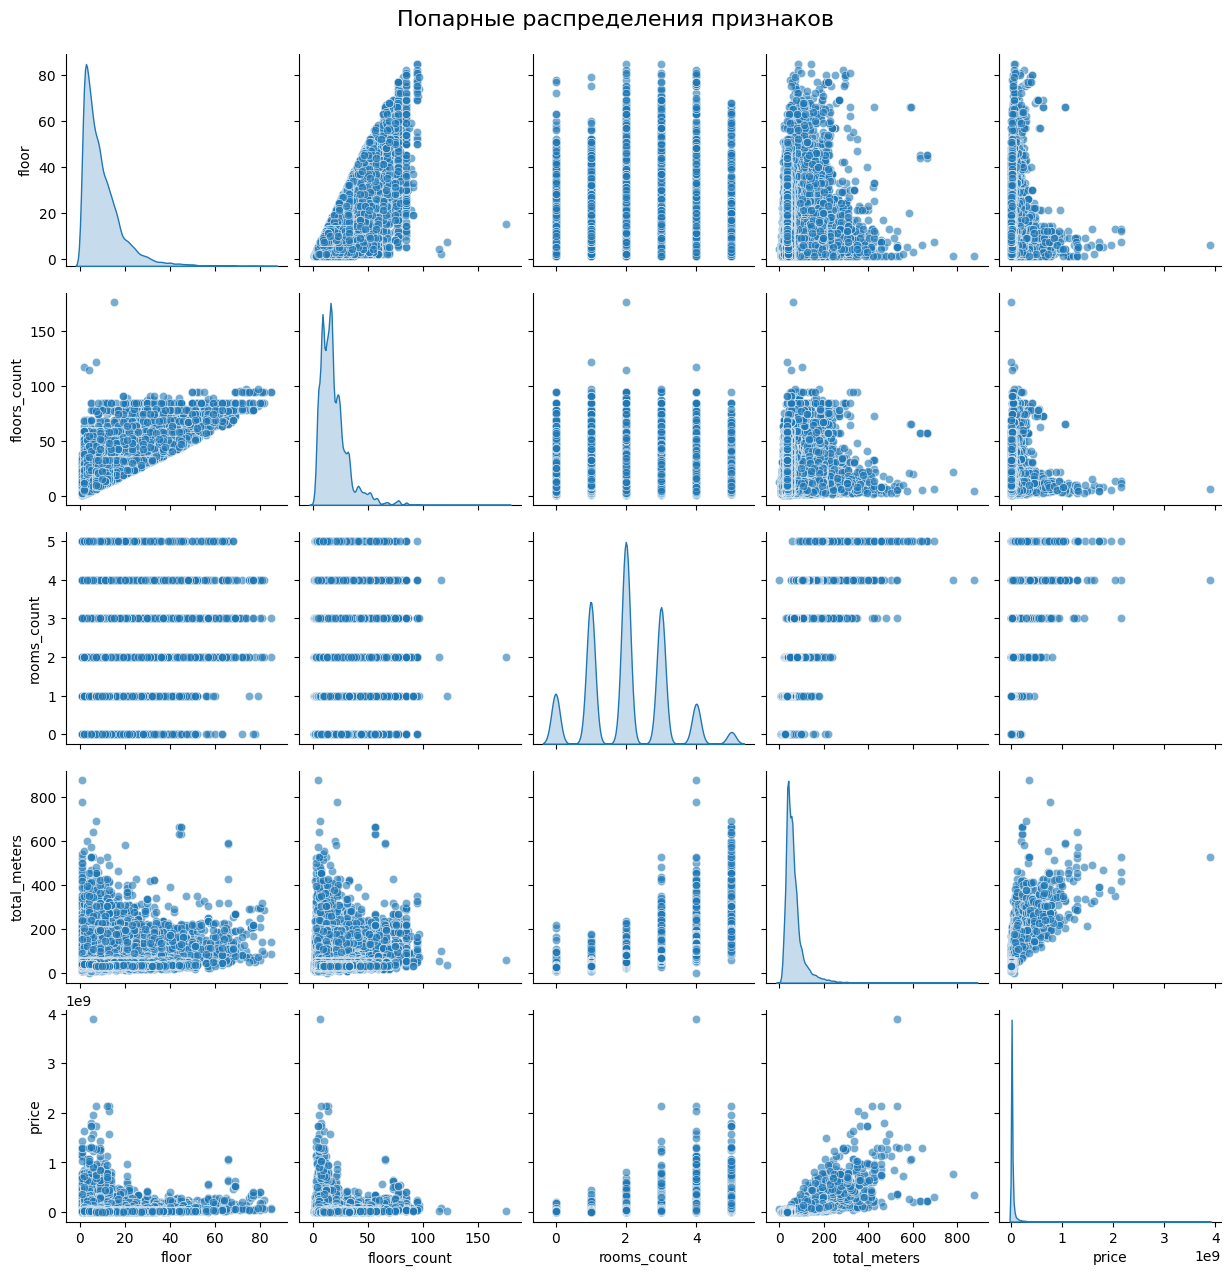

In [14]:
sns.pairplot(
    df_filtered,
    diag_kind="kde",
    plot_kws={'alpha': 0.6})

plt.suptitle("Попарные распределения признаков", y=1.02, fontsize=16)
plt.show()

- На диагоналях отображаются основные распределения признаков, большинство из которых имеют смещение вправо.

- Взаимосвязь между `total_meters` и `price` наиболее очевидна, что подтверждает важность площади при оценке стоимости.

- Между `rooms_count` и `total_meters` также заметна закономерность: увеличение числа комнат связано с ростом площади.

- Корреляции между другими признаками выражены слабее.

### Общие выводы:

1. **Выбросы**: Значительные выбросы присутствуют по всем признакам, особенно по цене и этажам.

2. **Корреляция**: Цена наиболее сильно коррелирует с количеством комнат и общей площадью.

3. **Аномалии**: Высотные дома (свыше 50 этажей) и элитная недвижимость создают искажения в распределении.

**Boxplot и выбросы**

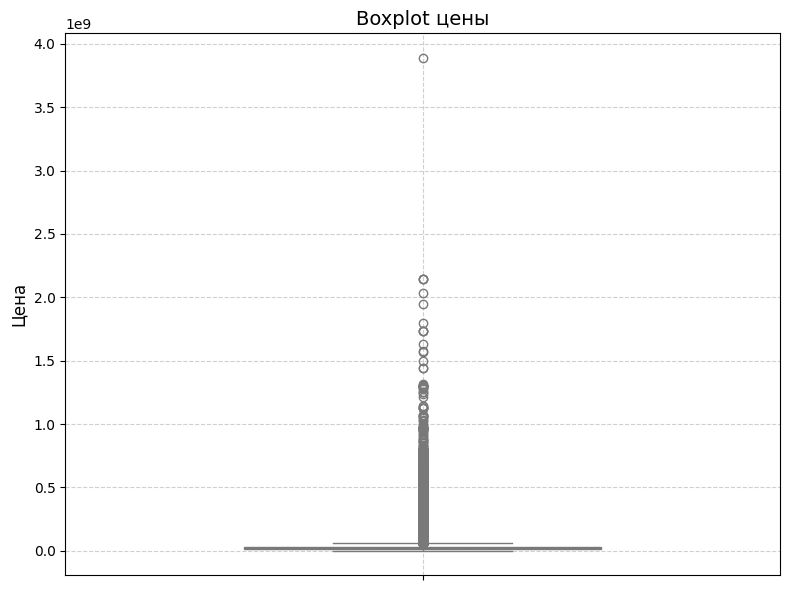

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered['price'], color='lightblue', width=0.5)
plt.title('Boxplot цены', fontsize=14)
plt.ylabel('Цена', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [17]:
df_size_before_outliers_removal = df_filtered.shape[0]

In [18]:
Q1 = df_filtered['price'].quantile(0.25)
Q3 = df_filtered['price'].quantile(0.75)
IQR = Q3 - Q1

h = Q3 + 1.5 * IQR
l = Q1 - 1.5 * IQR

df_filtered = df_filtered[df_filtered['price'].between(l, h)]

In [19]:
df_size_after_outliers_removal = df_filtered.shape[0]

In [21]:
df_size_before_outliers_removal - df_size_after_outliers_removal

8375

Таким образом, в нашем датасете было найдено 8375 выбросов, которые мы удалили.

**Корреляционный анализ**

In [23]:
correlation_matrix = df_filtered.corr(numeric_only=True)
correlation_matrix

,floor,floors_count,rooms_count,total_meters,price
floor,1.000000,0.630423,0.020453,0.098727,0.225195
floors_count,0.630423,1.000000,-0.007446,0.114361,0.308163
rooms_count,0.020453,-0.007446,1.000000,0.837231,0.558706
total_meters,0.098727,0.114361,0.837231,1.000000,0.734347
price,0.225195,0.308163,0.558706,0.734347,1.000000


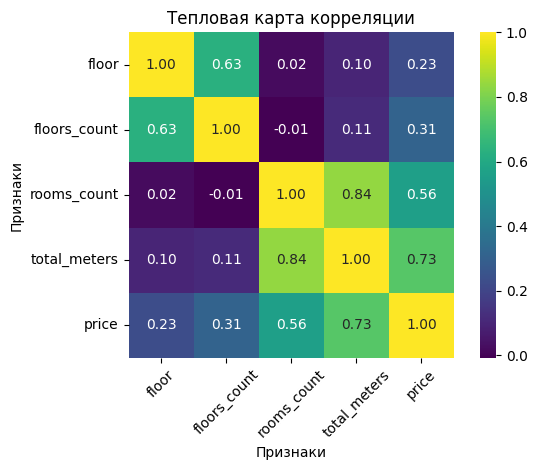

In [27]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.title('Тепловая карта корреляции')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **floor и floors_count**: корреляция 0.63, что указывает на умеренную положительную связь. Чем выше этаж, тем больше количество этажей в здании.
  
- **floor и rooms_count**: корреляция 0.02, практически отсутствует связь. Этажность не влияет на количество комнат.

- **floor и total_meters**: корреляция 0.10, слабая положительная связь. Этаж не имеет значительного влияния на общую площадь.

- **floor и price**: корреляция 0.23, слабая положительная связь. Этаж оказывает незначительное влияние на цену.

- **floors_count и rooms_count**: корреляция -0.01, практически отсутствует. Количество этажей не имеет влияния на количество комнат.

- **floors_count и total_meters**: корреляция 0.11, слабая положительная связь. Количество этажей не влияет на общую площадь.

- **floors_count и price**: корреляция 0.31, умеренная положительная связь. Количество этажей может иметь умеренное влияние на цену.

- **rooms_count и total_meters**: корреляция 0.84, сильная положительная связь. Большее количество комнат обычно связано с большей общей площадью.

- **rooms_count и price**: корреляция 0.56, умеренная положительная связь. Количество комнат оказывает заметное влияние на цену.

- **total_meters и price**: корреляция 0.73, сильная положительная связь. Большая площадь оказывает заметное влияние на цену.

### Общие выводы:

1. Поскольку между признаками **rooms_count** и **total_meters** наблюдается высокая корреляция (0.837), существует риск мультиколлинеарности. Чтобы избежать этого, рекомендуется удалить один из этих признаков. Например, можно удалить **rooms_count**, так как общая площадь (**total_meters**) более точно отражает размеры объекта.

2. Кроме того, корреляция между признаками **floor** и **floors_count** составляет 0.630. Это указывает на умеренную положительную связь между этими признаками, что может привести к избыточности данных. Рекомендуется удалить **floors_count**, так как **floor** может достаточно точно отразить информацию о расположении объекта в здании.

In [28]:
df_filtered = df_filtered.drop(['rooms_count', 'floors_count'], axis=1)